In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/dataset.csv", index_col=0)
df.head()

,image,pt0,pt1,pt2,pt3,labeled
0,data/dactar/1300_img.png,"[177.16228095049055, 184.83182101741053]","[244.7514603300629, 183.11345205013328]","[245.324249985822, 205.4522486247377]","[177.73507060624965, 207.17061759201496]",1
1,data/dactar/1766_img.png,"[409.7109787838158, 362.74050003943523]","[536.5506349081159, 360.4343244735389]","[537.703722691064, 392.720782396088]","[410.8640665667639, 395.02695796198435]",1
2,data/dactar/130_img.png,"[386.66894459252546, 342.1963080587535]","[503.59743095332624, 340.2794476266092]","[503.59743095332624, 369.9907843248455]","[386.66894459252546, 371.9076447569898]",1
3,data/dactar/1785_img.png,"[197.75577726950075, 171.98786970581278]","[250.16054105213345, 171.4531272182349]","[250.69528353971134, 194.44705418408392]","[198.29051975707864, 194.9817966716618]",1
4,data/dactar/617_img.png,"[180.14505945291972, 298.14972872833135]","[288.54786479895654, 297.1818465377417]","[288.54786479895654, 345.5759560672224]","[180.14505945291972, 346.54383825781207]",1


In [3]:
from torch.utils.data import Dataset
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms

In [12]:
model = models.resnet18(pretrained=True)
'''
output of our model is :
x1, y1,
x2, y2,
x3, y3,
x4, y4,
conf
'''
# model.eval()
# model.fc = nn.Linear(512, 9)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

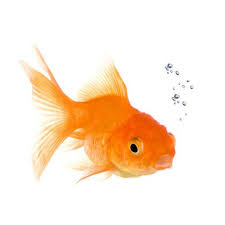

In [13]:
from PIL import Image
# img_name = df['image'][10]
img_name = 'data/goldfish.jpeg'
img = Image.open(img_name)#.convert('RGB') #not normalized
# img = np.array(img)
# img1 = plt.imread(img_name) #normalized
# (img1 == img)
img

In [14]:
transform = transforms.Compose([
#                 transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])

In [15]:
tensor_img = transform(img)
input_img = tensor_img.unsqueeze(0)
input_img.shape

torch.Size([1, 3, 225, 225])

In [16]:
output = model(input_img)

In [17]:
output.argmax(), output.max()

(tensor(463), tensor(2.4477, grad_fn=<MaxBackward1>))

In [10]:
# vals, preds = torch.max(output, 1)
# vals, preds